In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import zscore
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
headway_data = pd.read_csv("../data/headway_data.csv", delimiter = '\t')
headway_data.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,112,0.000000,-0.258889


**Question:** Calculate Z-Scores and Quantiles to determine outliers and remove them. 

In [3]:
# Add z-scores for headway_deviation and adherence
headway_data['Z_HDWY_DEV'] = zscore(headway_data['HDWY_DEV'])
headway_data['Z_ADHERENCE'] = zscore(headway_data['ADHERENCE'])
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723


In [4]:
headway_data['UNIQUE_TRIP_ID'] = headway_data['CALENDAR_ID'].astype(str) + '_' + headway_data['TRIP_ID'].astype(str)
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107


**Question:** How many unique IDs do we have? 

In [5]:
headway_data['UNIQUE_TRIP_ID'].nunique()

64928

**Question:** What are the statistiscs on headway_deviation and adherence?

In [32]:
OG_means_stats = headway_data.agg({
    'HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
OG_means_stats.columns = ['Statistic', 'HDWY_DEV', 'ADHERENCE']

OG_means_stats

,Statistic,HDWY_DEV,ADHERENCE
0,count,265884.000000,265884.000000
1,mean,0.518131,-3.503356
2,std,7.161798,6.500218
3,min,-64.000000,-948.533333
4,max,565.433333,85.666666


**Visualization:** Create a density plot for z-scores

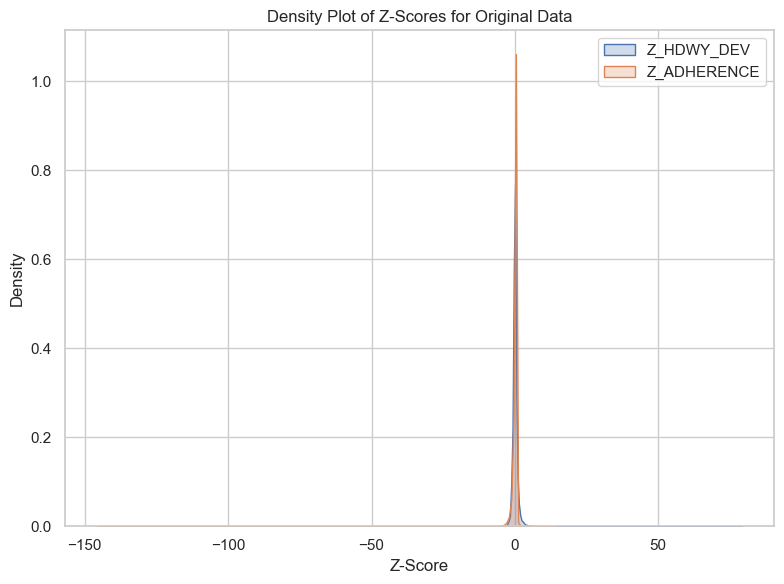

In [7]:
# Set the style for the plot (optional, for styling)
sns.set(style="whitegrid")

# Create a density plot (kernel density estimate) for 'Z_HDWY_DEV' and 'Z_ADHERENCE'
plt.figure(figsize=(8, 6))

# Create a density plot for 'Z_HDWY_DEV'
sns.kdeplot(data=headway_data, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV')

# Create a density plot for 'Z_ADHERENCE'
sns.kdeplot(data=headway_data, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE')

# Customize the x-axis limits to remove excessive white space
# plt.xlim(-10, 10)  # Adjust the limits as needed based on your data

# Customize the plot
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.title('Density Plot of Z-Scores for Original Data')
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

**Creating the filter to remove outliers**

Filter: Only keep the data points that falls within 90% of distribution. 

In [8]:
z_scores = headway_data['Z_HDWY_DEV']
z_scores2 = headway_data['Z_ADHERENCE']

# Determine the z-score values for the 5th and 95th percentiles
z_score_5th_percentile = norm.ppf(0.05)
z_score_95th_percentile = norm.ppf(0.95)

# Filter the DataFrame to retain only rows within the z-score range
prepocessed_data = headway_data[(z_scores >= z_score_5th_percentile) & (z_scores <= z_score_95th_percentile)]
processed_data = prepocessed_data.loc[(z_scores2 >= z_score_5th_percentile) & (z_scores2 <= z_score_95th_percentile)]

# 'filtered_df' now contains the data with outliers removed, retaining the central 90% of the data.
processed_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107


**Question**: How many unique IDs do we have?

In [9]:
processed_data['UNIQUE_TRIP_ID'].nunique()

63331

In [10]:
processed_data_stats = processed_data.agg({
    'HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
processed_data_stats.columns = ['Statistic', 'HDWY_DEV', 'ADHERENCE']

processed_data_stats

,Statistic,HDWY_DEV,ADHERENCE
0,count,247584.000000,247584.000000
1,mean,-0.003590,-2.789851
2,std,3.920920,3.034782
3,min,-11.250000,-14.183333
4,max,12.283333,7.150000


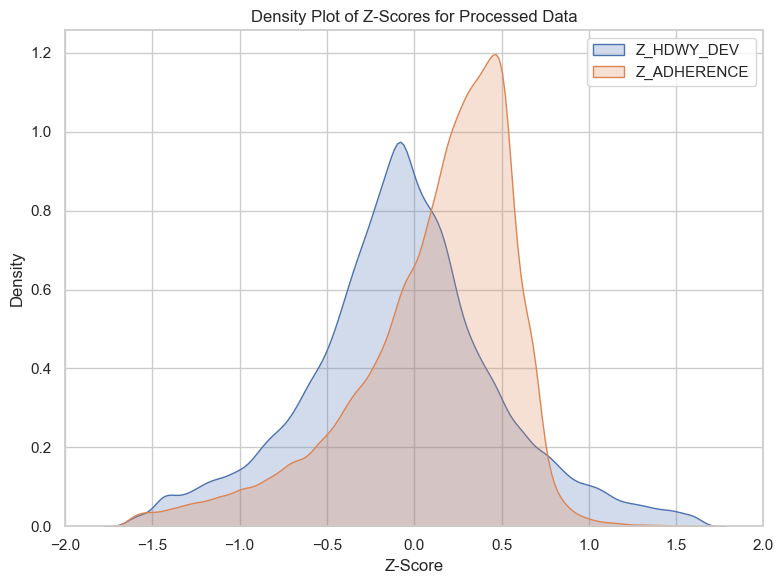

In [11]:
# Set the style for the plot (optional, for styling)
sns.set(style="whitegrid")

# Create a density plot (kernel density estimate) for 'Z_HDWY_DEV' and 'Z_ADHERENCE'
plt.figure(figsize=(8, 6))

# Create a density plot for 'Z_HDWY_DEV'
sns.kdeplot(data=processed_data, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV')

# Create a density plot for 'Z_ADHERENCE'
sns.kdeplot(data=processed_data, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE')

# Customize the x-axis limits to remove excessive white space
plt.xlim(-2, 2)  # Adjust the limits as needed based on your data

# Customize the plot
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.title('Density Plot of Z-Scores for Processed Data')
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

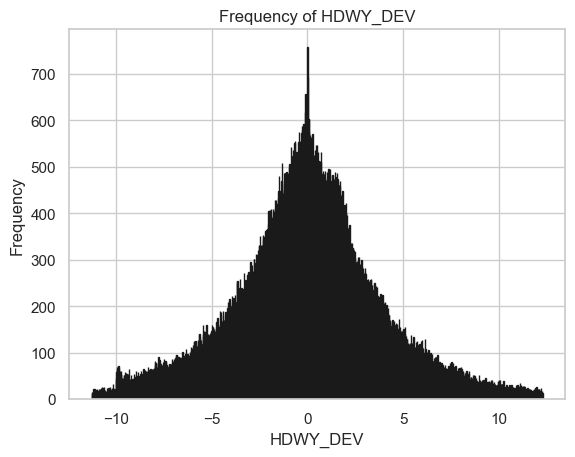

In [12]:
plt.hist(processed_data['HDWY_DEV'], bins=len(processed_data['HDWY_DEV'].unique()), edgecolor='k')
plt.xlabel('HDWY_DEV')
plt.ylabel('Frequency')
plt.title('Frequency of HDWY_DEV')
plt.show()

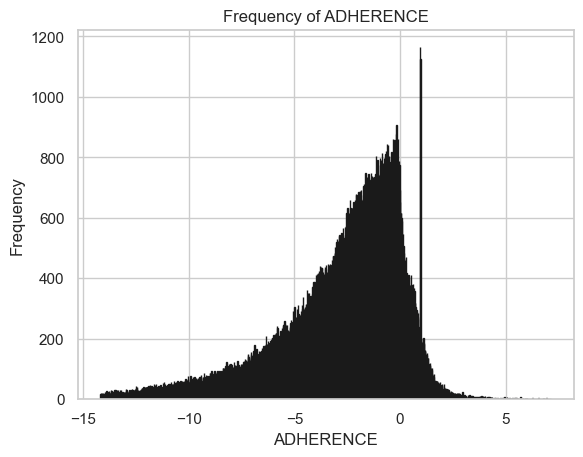

In [13]:
plt.hist(processed_data['ADHERENCE'], bins=len(processed_data['HDWY_DEV'].unique()), edgecolor='k')
plt.xlabel('ADHERENCE')
plt.ylabel('Frequency')
plt.title('Frequency of ADHERENCE')
plt.show()

**Goal:** Create a new dataframe that removes UNIQUE_TRIP_IDs with trips that fall outside the 90% percentile dataset. 

In [14]:
# This agg method is pretty cool and allows you to perform operations on aggregate groups like 
# calculating means or max or whatever 
trip_means = headway_data.groupby('UNIQUE_TRIP_ID').agg({'ADHERENCE': 'mean', 'HDWY_DEV': 'mean'}).reset_index()

# add the means to original df to filter off those values
headway_data_with_means = headway_data.merge(trip_means, on='UNIQUE_TRIP_ID', suffixes=('', '_mean'))

# Calculate the 5th and 95th percentiles of the mean adherence and hdway_dev 
adherence_bounds = {
    'lower': headway_data_with_means['ADHERENCE_mean'].quantile(0.05),
    'upper': headway_data_with_means['ADHERENCE_mean'].quantile(0.95)
}
hdway_dev_bounds = {
    'lower': headway_data_with_means['HDWY_DEV_mean'].quantile(0.05),
    'upper': headway_data_with_means['HDWY_DEV_mean'].quantile(0.95)
}

# Filter the DataFrame based on the calculated percentiles
filtered_df = headway_data_with_means[
    (headway_data_with_means['ADHERENCE_mean'] >= adherence_bounds['lower']) &
    (headway_data_with_means['ADHERENCE_mean'] <= adherence_bounds['upper']) &
    (headway_data_with_means['HDWY_DEV_mean'] >= hdway_dev_bounds['lower']) &
    (headway_data_with_means['HDWY_DEV_mean'] <= hdway_dev_bounds['upper'])
]

filtered_df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,ADHERENCE_mean,HDWY_DEV_mean
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106,-1.272222,1.383333
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106,-1.272222,1.383333
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106,-1.272222,1.383333
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107,0.091667,-3.025000
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107,0.091667,-3.025000


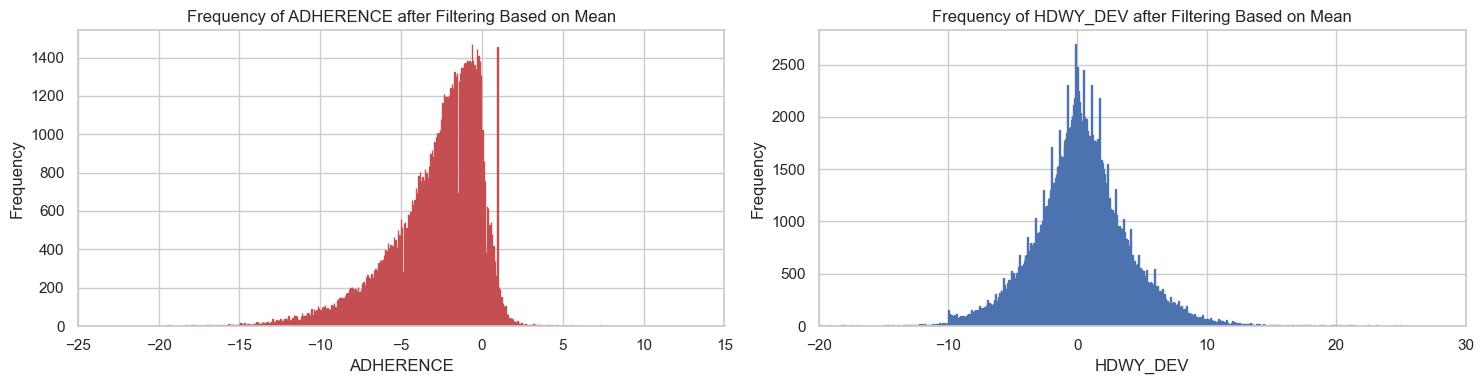

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

axes[0].hist(filtered_df['ADHERENCE'], bins=len(filtered_df['HDWY_DEV'].unique()), edgecolor='r')
axes[0].set_xlabel('ADHERENCE')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of ADHERENCE after Filtering Based on Mean')
axes[0].set_xlim(-25, 15)

axes[1].hist(filtered_df['HDWY_DEV'], bins=len(filtered_df['ADHERENCE'].unique()), edgecolor='b')
axes[1].set_xlabel('HDWY_DEV')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of HDWY_DEV after Filtering Based on Mean')
axes[1].set_xlim(-20, 30)
  
plt.tight_layout()
plt.show()

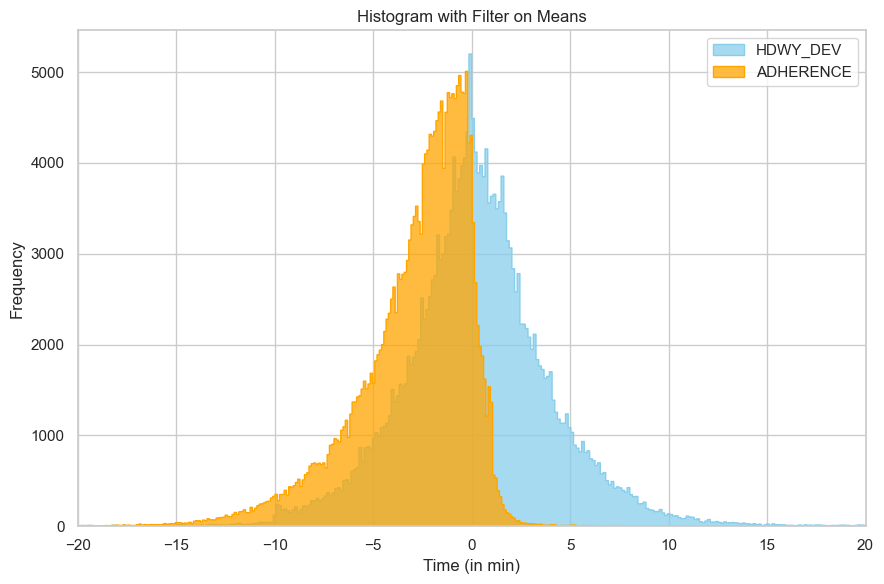

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))  # You can adjust the figure size as needed

# Plot histograms for 'HDWY_DEV' and 'ADHERENCE' from the filtered_df DataFrame on a single subplot
sns.histplot(data=filtered_df, x='HDWY_DEV', element="step", color='skyblue', label='HDWY_DEV', ax=ax)
sns.histplot(data=filtered_df, x='ADHERENCE', element="step", color='orange', label='ADHERENCE', ax=ax)

# Customize the title for the subplot
ax.set_xlabel('Time (in min)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram with Filter on Means')
ax.set_xlim(-20, 20)  # Adjust limits as needed

ax.legend()

plt.tight_layout()
plt.show()

In [16]:
means_stats = filtered_df.agg({
    'HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
means_stats.columns = ['Statistic', 'HDWY_DEV', 'ADHERENCE']

means_stats

,Statistic,HDWY_DEV,ADHERENCE
0,count,220514.000000,220514.000000
1,mean,0.315326,-2.890684
2,std,4.035302,2.939824
3,min,-33.900000,-35.300000
4,max,78.966666,19.250000


In [17]:
filtered_df['UNIQUE_TRIP_ID'].nunique()

53645

In [18]:
headway_data['UNIQUE_TRIP_ID'].nunique()

64928

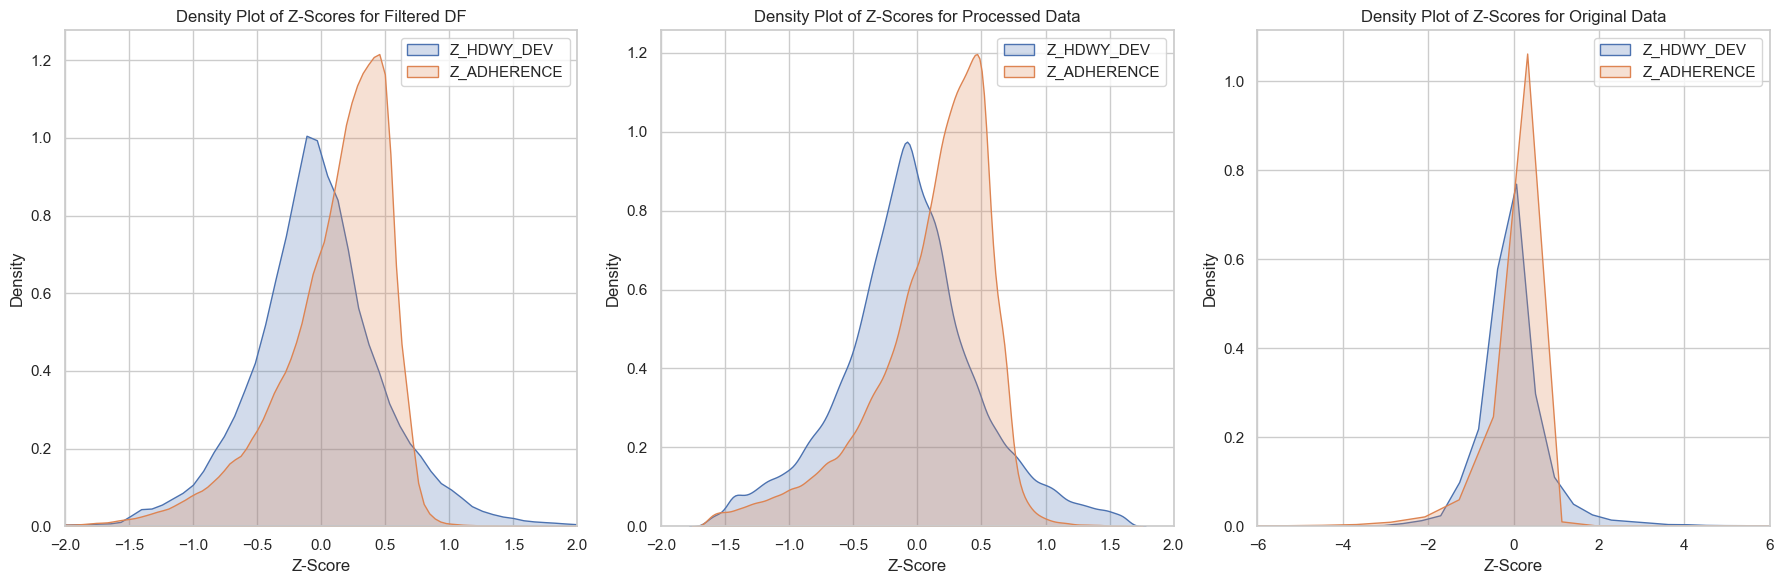

In [19]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # You can adjust the figure size as needed

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the filtered_df DataFrame on the first subplot
sns.kdeplot(data=filtered_df, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV', ax=axes[0])
sns.kdeplot(data=filtered_df, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE', ax=axes[0])

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the processed_data DataFrame on the second subplot
sns.kdeplot(data=processed_data, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV', ax=axes[1])
sns.kdeplot(data=processed_data, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE', ax=axes[1])

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the headway_data (original) DataFrame on the third subplot
sns.kdeplot(data=headway_data, x='Z_HDWY_DEV', fill=True, common_norm=True, label='Z_HDWY_DEV', ax=axes[2])
sns.kdeplot(data=headway_data, x='Z_ADHERENCE', fill=True, common_norm=True, label='Z_ADHERENCE', ax=axes[2])

# Customize the titles for each subplot
axes[0].set_xlabel('Z-Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot of Z-Scores for Filtered DF')
axes[0].set_xlim(-2, 2)

axes[1].set_xlabel('Z-Score')
axes[1].set_ylabel('Density')
axes[1].set_title('Density Plot of Z-Scores for Processed Data')
axes[1].set_xlim(-2, 2)

axes[2].set_xlabel('Z-Score')
axes[2].set_ylabel('Density')
axes[2].set_title('Density Plot of Z-Scores for Original Data')
axes[2].set_xlim(-6, 6)

plt.tight_layout()

axes[0].legend()
axes[1].legend()
axes[2].legend()

# Show the subplots
plt.show()

**Goal:** Create a new dataframe that removes UNIQUE_TRIP_IDs with trips that fall outside the 90% percentile dataset. 

This code checks if any z-scores within each 'UNIQUE_TRIP_ID' group fall outside the 90th percentile range for both 'Z_HDWY_DEV' and 'Z_ADHERENCE.' If none of the z-scores within a group fall outside the valid range, the entire group is considered valid, and the data for that 'UNIQUE_TRIP_ID' is included in the filtered_headway_data DataFrame. 

In [20]:
# Calculate the z-scores as you've done
z_scores = headway_data['Z_HDWY_DEV']
z_scores2 = headway_data['Z_ADHERENCE']

# Determine the z-score values for the 5th and 95th percentiles
z_score_5th_percentile = norm.ppf(0.05)
z_score_95th_percentile = norm.ppf(0.95)

# Group the original DataFrame by 'UNIQUE_TRIP_ID'
grouped = headway_data.groupby('UNIQUE_TRIP_ID')

# Create an empty list to store valid data
valid_data = []

# Iterate over each group, check for valid z-scores, and append valid data to the list
for name, group in grouped:
    z_scores_in_group = group['Z_HDWY_DEV']
    z_scores2_in_group = group['Z_ADHERENCE']
    
    # Check if any z-scores in the group fall outside the 90th percentile range
    if not (
        any(z_scores_in_group < z_score_5th_percentile) or
        any(z_scores_in_group > z_score_95th_percentile) or
        any(z_scores2_in_group < z_score_5th_percentile) or
        any(z_scores2_in_group > z_score_95th_percentile)
    ):
        valid_data.append(group)

# Concatenate the valid data from all groups into a single DataFrame
filtered_headway_data = pd.concat(valid_data)

# 'filtered_headway_data' contains the data with 'UNIQUE_TRIP_IDs' that meet the z-score filter
filtered_headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107


In [21]:
filtered_headway_data['UNIQUE_TRIP_ID'].nunique()

56697

Original dataset (headway_data df) had 64,928 UNIQUE_TRIP_ID. 
- Filter based on 90% percentile of z-scores (filtered_headway_data df) kept 87% of data. 
- Filter based on 90% percentile of means (filtered_df) kept 82.6% of data (53,645 UNIQUE_TRIP_ID). 

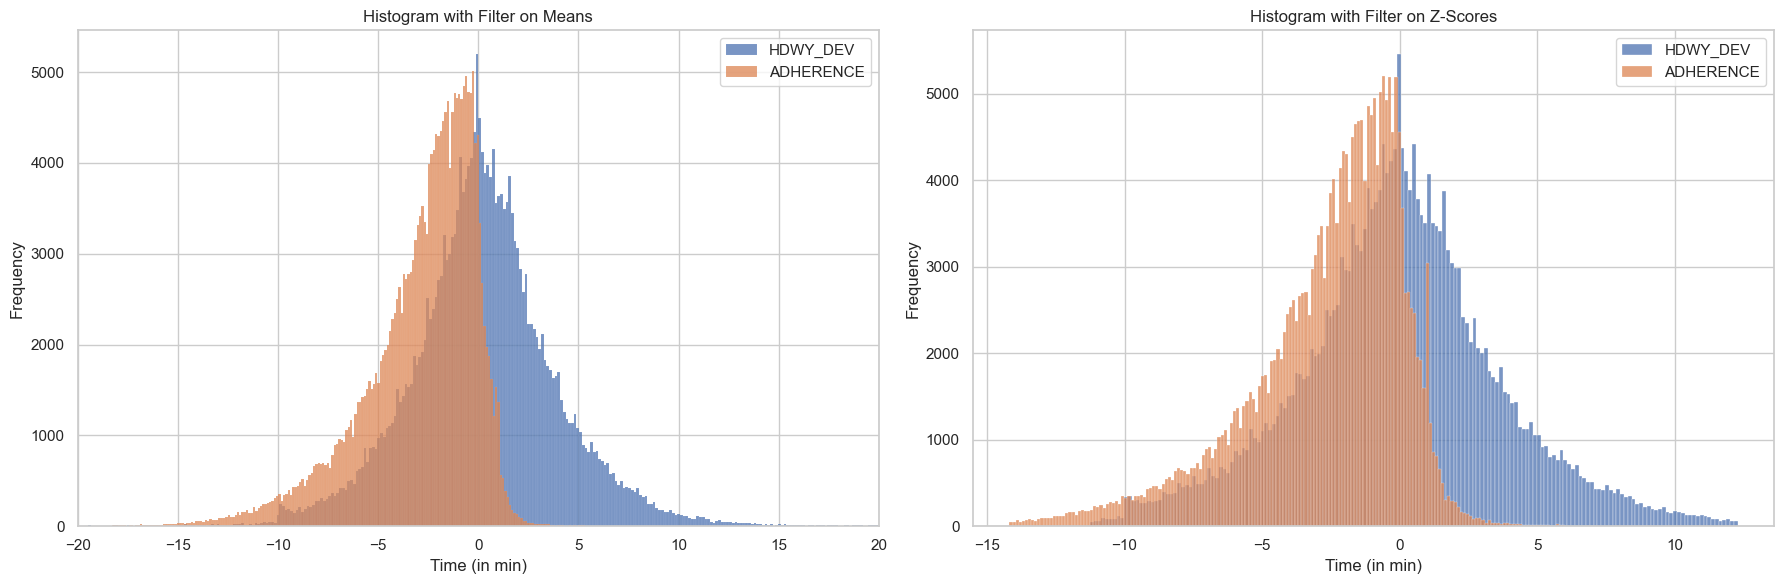

In [26]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # You can adjust the figure size as needed

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the filtered_df DataFrame on the first subplot
sns.histplot(data=filtered_df, x='HDWY_DEV', fill=True, common_norm=True, label='HDWY_DEV', ax=axes[0])
sns.histplot(data=filtered_df, x='ADHERENCE', fill=True, common_norm=True, label='ADHERENCE', ax=axes[0])

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the processed_data DataFrame on the second subplot
sns.histplot(data=filtered_headway_data, x='HDWY_DEV', fill=True, common_norm=True, label='HDWY_DEV', ax=axes[1])
sns.histplot(data=filtered_headway_data, x='ADHERENCE', fill=True, common_norm=True, label='ADHERENCE', ax=axes[1])

# Customize the titles for each subplot
axes[0].set_xlabel('Time (in min)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram with Filter on Means')
axes[0].set_xlim(-20, 20)

axes[1].set_xlabel('Time (in min)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram with Filter on Z-Scores')
# axes[1].set_xlim(-2, 2)

plt.tight_layout()

axes[0].legend()
axes[1].legend()

plt.show()

In [24]:
means_stats = filtered_headway_data.agg({
    'HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
means_stats.columns = ['Statistic', 'HDWY_DEV', 'ADHERENCE']

means_stats

,Statistic,HDWY_DEV,ADHERENCE
0,count,229042.000000,229042.000000
1,mean,-0.039045,-2.641543
2,std,3.715245,2.852618
3,min,-11.250000,-14.183333
4,max,12.283333,7.150000


**Question:** What would the data look like if the filter was based on the 99% percentile of the data? 

In [29]:
# Calculate the z-scores as you've done
z_scores = headway_data['Z_HDWY_DEV']
z_scores2 = headway_data['Z_ADHERENCE']

# Determine the z-score values for the 1st and 99th percentiles
z_score_1st_percentile = norm.ppf(0.01)
z_score_99th_percentile = norm.ppf(0.99)

# Group the original DataFrame by 'UNIQUE_TRIP_ID'
grouped = headway_data.groupby('UNIQUE_TRIP_ID')

# Create an empty list to store valid data
valid_data = []

# Iterate over each group, check for valid z-scores, and append valid data to the list
for name, group in grouped:
    z_scores_in_group = group['Z_HDWY_DEV']
    z_scores2_in_group = group['Z_ADHERENCE']
    
    # Check if any z-scores in the group fall outside the 99th percentile range
    if not (
        any(z_scores_in_group < z_score_1st_percentile) or
        any(z_scores_in_group > z_score_99th_percentile) or
        any(z_scores2_in_group < z_score_1st_percentile) or
        any(z_scores2_in_group > z_score_99th_percentile)
    ):
        valid_data.append(group)

# Concatenate the valid data from all groups into a single DataFrame
filtered_headway_data2 = pd.concat(valid_data)

# 'filtered_headway_data' contains the data with 'UNIQUE_TRIP_IDs' that meet the z-score filter
filtered_headway_data2.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107


In [30]:
means_stats = filtered_headway_data2.agg({
    'HDWY_DEV': ['count', 'mean', 'std', 'min', 'max'],
    'ADHERENCE': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for clarity
means_stats.columns = ['Statistic', 'HDWY_DEV', 'ADHERENCE']

means_stats

,Statistic,HDWY_DEV,ADHERENCE
0,count,245362.000000,245362.000000
1,mean,0.051711,-2.910121
2,std,4.309599,3.313115
3,min,-16.116667,-18.616666
4,max,17.166666,11.616666


In [34]:
filtered_headway_data2['UNIQUE_TRIP_ID'].nunique()

60350

**Observation:** Compared to the original data (247,584 rows), we kept 92% of the data with row counts at 245,362. Lost 4,578 UNIQUE_TRIP_IDs. 

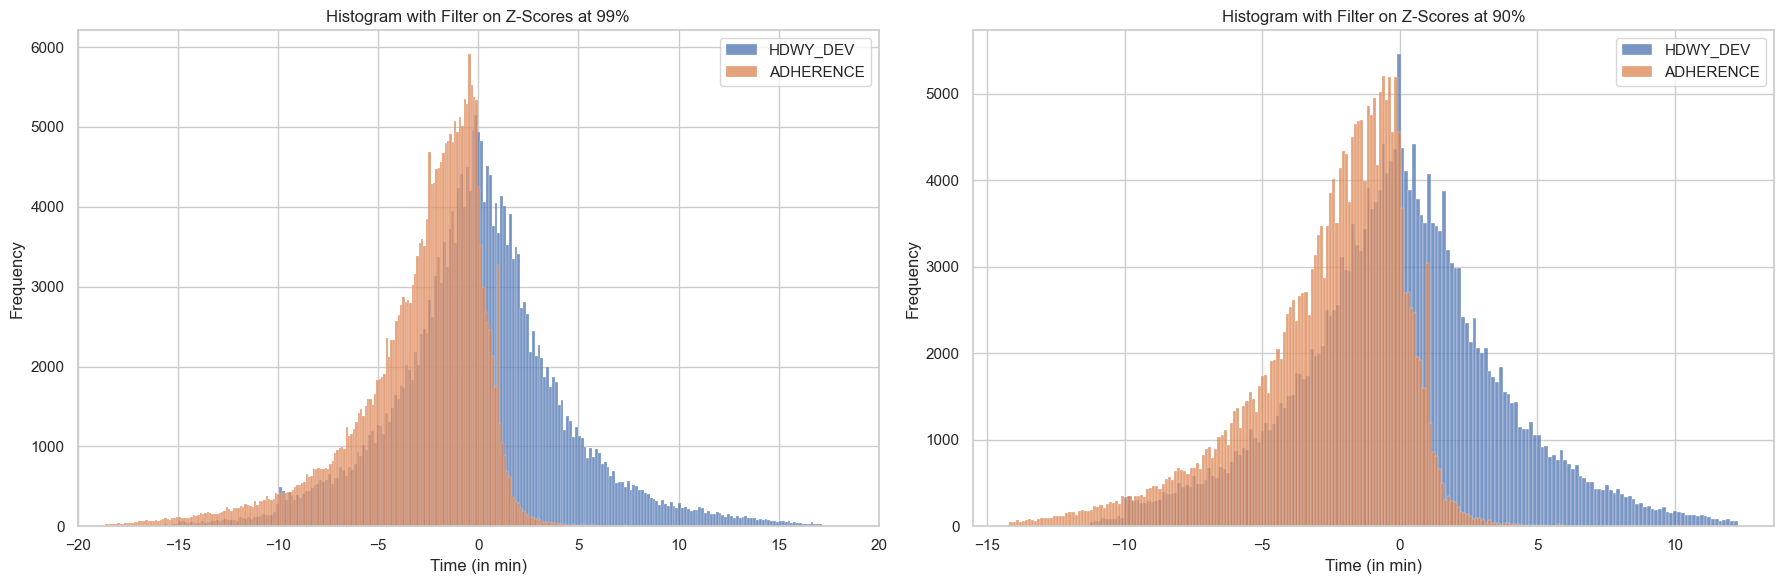

In [31]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # You can adjust the figure size as needed

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the filtered_df DataFrame on the first subplot
sns.histplot(data=filtered_headway_data2, x='HDWY_DEV', fill=True, common_norm=True, label='HDWY_DEV', ax=axes[0])
sns.histplot(data=filtered_headway_data2, x='ADHERENCE', fill=True, common_norm=True, label='ADHERENCE', ax=axes[0])

# Plot the density plots for 'Z_HDWY_DEV' and 'Z_ADHERENCE' from the processed_data DataFrame on the second subplot
sns.histplot(data=filtered_headway_data, x='HDWY_DEV', fill=True, common_norm=True, label='HDWY_DEV', ax=axes[1])
sns.histplot(data=filtered_headway_data, x='ADHERENCE', fill=True, common_norm=True, label='ADHERENCE', ax=axes[1])

# Customize the titles for each subplot
axes[0].set_xlabel('Time (in min)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram with Filter on Z-Scores at 99%')
axes[0].set_xlim(-20, 20)

axes[1].set_xlabel('Time (in min)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram with Filter on Z-Scores at 90%')
# axes[1].set_xlim(-2, 2)

plt.tight_layout()

axes[0].legend()
axes[1].legend()

plt.show()